In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime as dt

# model is based on the close price, can also be built on high, low, or open price

In [94]:
#initiate a start and end time for our dataframe
start = dt.datetime(2010, 1, 1)
#end = dt.datetime(2019, 12, 31)
end = dt.datetime.today()

df = data.DataReader('AAPL', 'stooq', start, end)

#we have to reverse the dataframe because stooq gives us the data in reverse
df = df[::-1]

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08
2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08


In [95]:
#see the end of the datafram
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-27,196.020,197.200,192.5500,193.220,47460180.0
2023-07-28,194.670,196.626,194.1400,195.830,48291443.0
2023-07-31,196.060,196.490,195.2600,196.450,38824113.0
2023-08-01,196.235,196.730,195.2800,195.605,35281426.0
2023-08-02,195.040,195.180,191.8507,192.580,50389327.0


In [96]:
#add an index to our dataframe
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08
1,2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2,2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3,2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
4,2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08


In [97]:
#drop the date column from dataframe
df = df.drop(['Date'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,6.49958,6.53008,6.46597,6.51522,5.764890e+08
1,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3,6.44444,6.45421,6.36409,6.41085,5.588893e+08
4,6.40586,6.45421,6.36458,6.45401,5.246856e+08


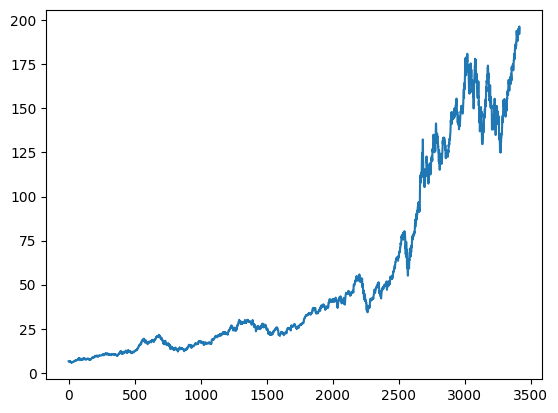

In [98]:
#plot the graph of close price
plt.plot(df.Close)

In [99]:
#create a moving average of 100 days function

ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3413    173.81405
3414    174.23405
3415    174.68255
3416    175.10990
3417    175.52980
Name: Close, Length: 3418, dtype: float64

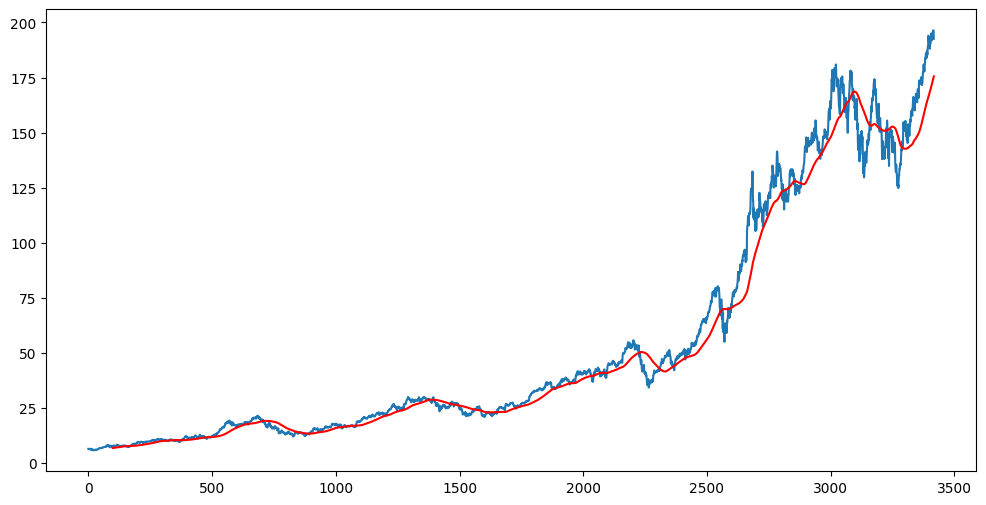

In [100]:
#plot the ma100 graph and close price 
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')


In [101]:
#create a moving average of 200 days function

ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3413    158.429980
3414    158.708195
3415    158.996695
3416    159.284165
3417    159.533300
Name: Close, Length: 3418, dtype: float64

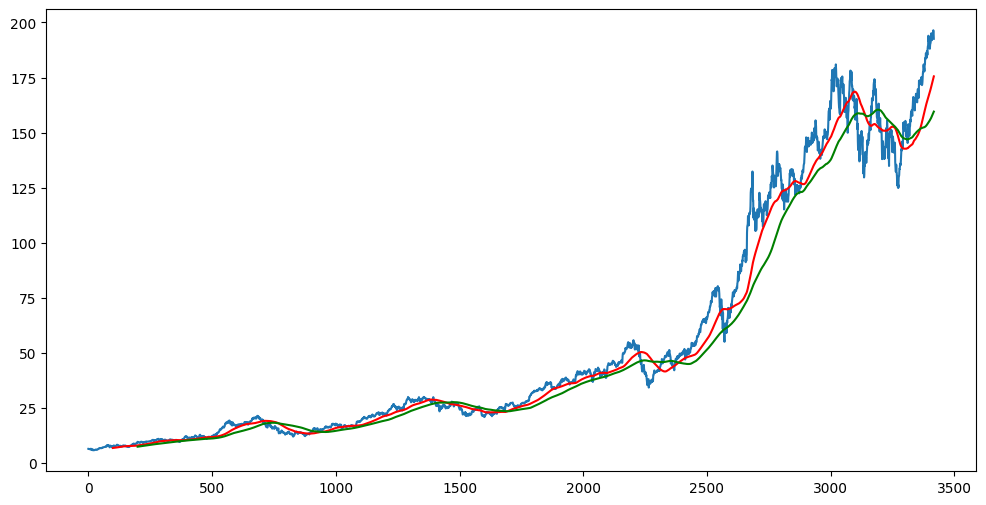

In [102]:
#plot the ma100 graph and close price 
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [103]:
#see the number of columns and rows

df.shape

(3418, 5)

In [104]:
#split the data into Training and Testing
#train 70% of the data, and test the rest
data_training = pd.DataFrame(df['Close'][0 : int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2392, 1)
(1026, 1)


In [105]:
data_training.head()

,Close
0,6.51522
1,6.52639
2,6.42221
3,6.41085
4,6.45401


In [106]:
data_testing.head()

,Close
2392,48.6546
2393,48.9547
2394,49.4372
2395,49.0803
2396,49.4542


In [107]:
#scaling down the data between 0 and 1
#have to preprocess the data using sklearn library minmaxscaler function

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [108]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01338642],
       [0.01361001],
       [0.01152464],
       ...,
       [0.8701652 ],
       [0.87834618],
       [0.87744942]])

In [109]:
#divid up the training model to prediction prereq x set and prediction res y set 

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [110]:
#ML Model dependencies
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [111]:
#ML Model 
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 1))

In [112]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [113]:
#Apply the adam optimization algorithm and run model 50 epochs
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 200)

Epoch 1/200
72/72 [==============================] - 8s 75ms/step - loss: 0.0259
Epoch 2/200
72/72 [==============================] - 6s 77ms/step - loss: 0.0051
Epoch 3/200
72/72 [==============================] - 6s 77ms/step - loss: 0.0047
Epoch 4/200
72/72 [==============================] - 6s 78ms/step - loss: 0.0050
Epoch 5/200
72/72 [==============================] - 6s 77ms/step - loss: 0.0044
Epoch 6/200
72/72 [==============================] - 6s 79ms/step - loss: 0.0038
Epoch 7/200
72/72 [==============================] - 6s 79ms/step - loss: 0.0040
Epoch 8/200
72/72 [==============================] - 6s 79ms/step - loss: 0.0039
Epoch 9/200
72/72 [==============================] - 6s 77ms/step - loss: 0.0037
Epoch 10/200
72/72 [==============================] - 6s 77ms/step - loss: 0.0034
Epoch 11/200
72/72 [==============================] - 6s 78ms/step - loss: 0.0031
Epoch 12/200
72/72 [==============================] - 6s 77ms/step - loss: 0.0030
Epoch 13/200
72/72 [=====

In [114]:
#Save the model
model.save('keras_model.h5')

c:\Users\Kai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [115]:
data_testing.head()

,Close
2392,48.6546
2393,48.9547
2394,49.4372
2395,49.0803
2396,49.4542


In [116]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index=True)
final_df.head()

C:\Users\Kai\AppData\Local\Temp\ipykernel_30484\938505723.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


,Close
0,41.4107
1,41.2402
2,41.3897
3,41.3000
4,41.4197


In [117]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.09851311e-03],
       [0.00000000e+00],
       [9.63212374e-04],
       ...,
       [1.00000000e+00],
       [9.94555756e-01],
       [9.75066007e-01]])

In [118]:
input_data.shape

(1126, 1)

In [119]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i-100, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)    

(1026, 100, 1)
(1026,)


In [120]:
# Make Predictions

y_predicted = model.predict(x_test)
y_predicted.shape

33/33 [==============================] - 1s 21ms/step


(1026, 1)

In [121]:
y_test

array([0.00109851, 0.        , 0.00096321, ..., 0.71103629, 0.71921876,
       0.70452897])

In [122]:
y_predicted

array([[0.10647911],
       [0.10728297],
       [0.10781834],
       ...,
       [0.95319813],
       [0.9558334 ],
       [0.9573559 ]], dtype=float32)

In [123]:
scaler = scaler.scale_


print(scaler)

0.006442892136965579


In [124]:
scale_factor = 1 / scaler[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

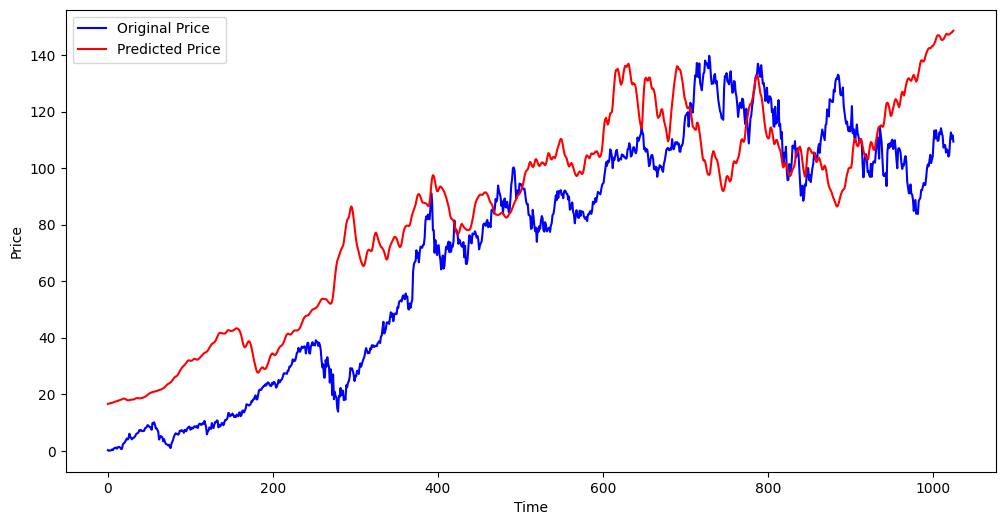

In [125]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()